# 회귀분석
: 실젯값과 예측값의 차이를 기반으로 한 지표들을 중심으로 성능 평가 지표가 생성될 수 있다.
- 실젯값과 예측값의 차이를 단순 합산하면 양수와 음수가 섞여있어 문제 발생

### MAE
- 실젯값과 예측값의 차이를 절댓값으로 변환해 평균을 구한 값
- 에러의 크기가 그대로 반영됨
- 이상치에 영향을 받는다.

### MSE
- 실쳇값과 예측값의 차이를 제곱해서 평균을 구한 값
- 실젯값과 예측값의 면적 합을 의미
- 이상치에 영향을 받는다.

### RMSE
- MSE의 값에 루트를 씌운 값
- 에러에 제곱을 하면, 에러가 클수록 그에 따른 가중치가 높이 반영되어 손실이 기하급수적으로 증가 -> 실제 오류 평균보다 값이 커지는 현상을 상쇄하기 위해 사용

### MSLE
- 실젯값과 예측값의 차이를 제곱해 평균을 낸 값(MSE)에 로그를 적용한 값
- RMSE처럼 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 커지는 현상을 상쇄하기 위해 사용

### MAPE
- MAE를 퍼센트로 표시
- 오차가 예측값에서 차지하는 정도를 나타냄

---

회귀 분석의 순서
1. 모델 선택하고 import
2. 모델 객체(class) 생성
3. 모델 학습 (독립 변수 + 종속 변수)
4. 데이터(독립 변수)를 주고 예측
5. 실젯값과 예측값을 확인하고 오차 체크

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# csv 폴더 안에 있는 boston.csv 파일 로드
boston = pd.read_csv("../csv/boston.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


boston 데이터의 컬럼들
- CRIM : 범죄율 (해당 지역 1인당 범죄 발생 수)
- ZN : 25,000 평방피트 이상 주거지역 비율
- INDUS : 비상업 지역 토지 비율
- CHAS : 찰스강 경계 여부 (1 : 경계, 0: 비경계)    -> 더미 데이터
- NOX5 : 일산화질소 농도 (10ppm 단위)
- RM : 주택 1가구당 평균 방 개수
- AGE7 : 1940년 이전의 지어진 주택 비율(건물이 30년 이상의 주택 비율)
- DIS : 작업 중심지(보스턴 5군데)까지의 가중 거리
- RAD : 방사형 고속도로 접근성 지수
- TAX : $10,000 당 제산세율
- PTRATIO : 지역별 학생-교사 비율
- B : 인종 지수 (흑인 거주 비율)
- LSTAT : 저소득층 비율 (%)
- Price : 주택의 가격의 중앙값

In [5]:
cols = boston.columns.difference( ['CHAS', 'Price'] )

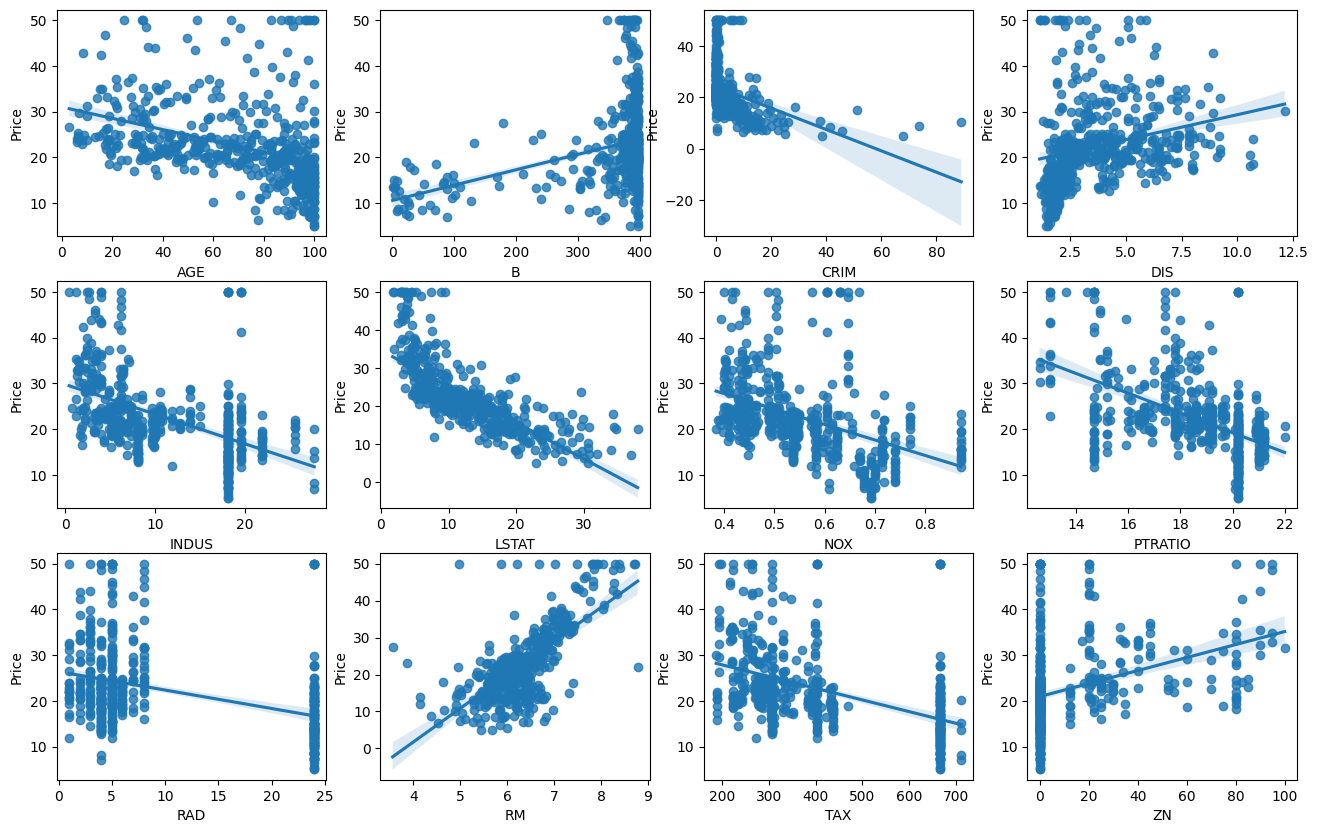

In [6]:
# subplots를 이용하여 Price와 CHAS 컬럼을 제외한 나머지 컬럼들 간의 산점도 그래프 그리기
fig, axes = plt.subplots(nrows= 3, ncols= 4, figsize= (16,10))

# cols를 기준으로 반복문 실행
for i in range(len(cols)):
    sns.regplot(x = cols[i], y = boston['Price'], data = boston, ax = axes.flat[i])

plt.show()

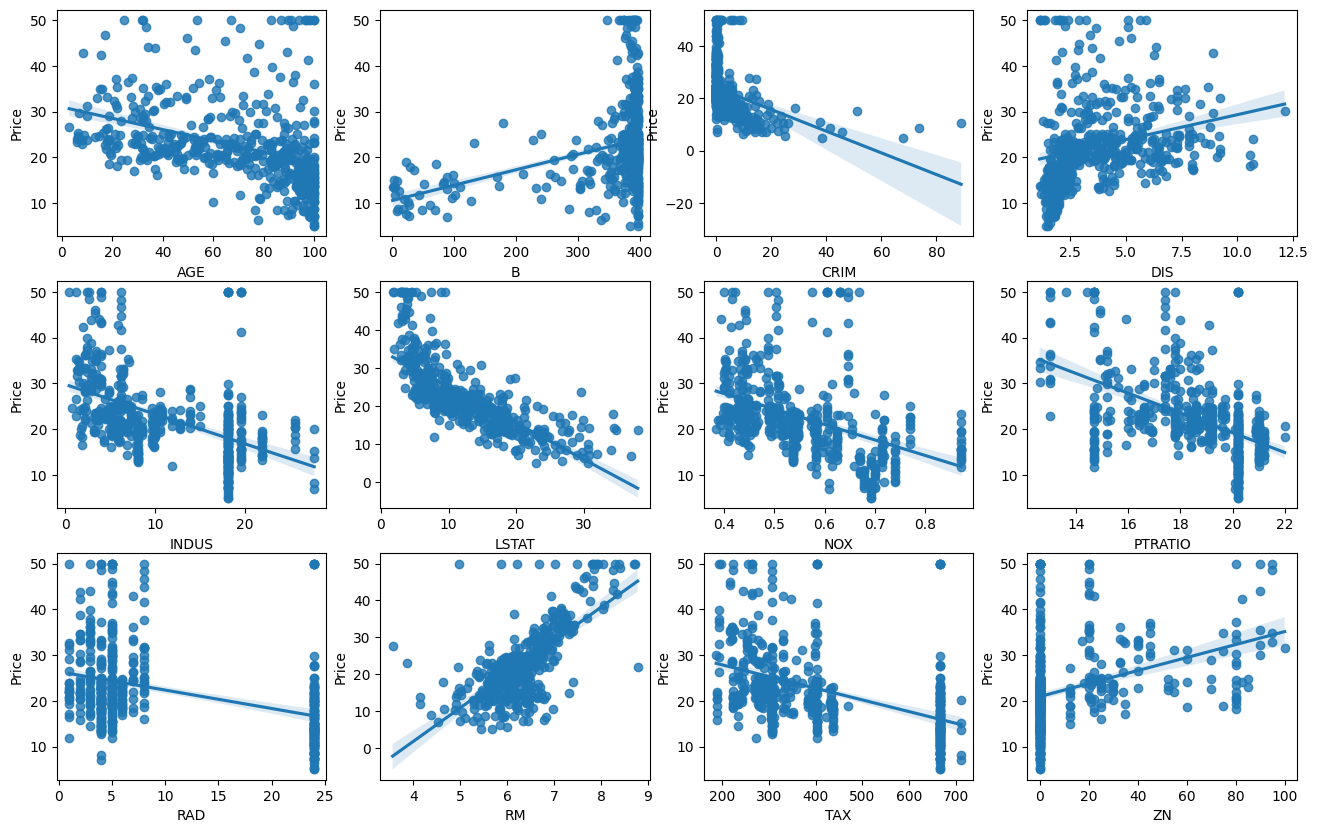

In [7]:
# subplots를 이용하여 Price와 CHAS컬럼을 제외한 나머지 컬럼들 간의 산점도 그래프 그리기
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

# cols를 기준으로 반복문 실행 
for i, col in zip(range(len(cols)), cols):
    sns.regplot(x = col, y = boston['Price'], data = boston, ax = axes.flat[i])

plt.show()

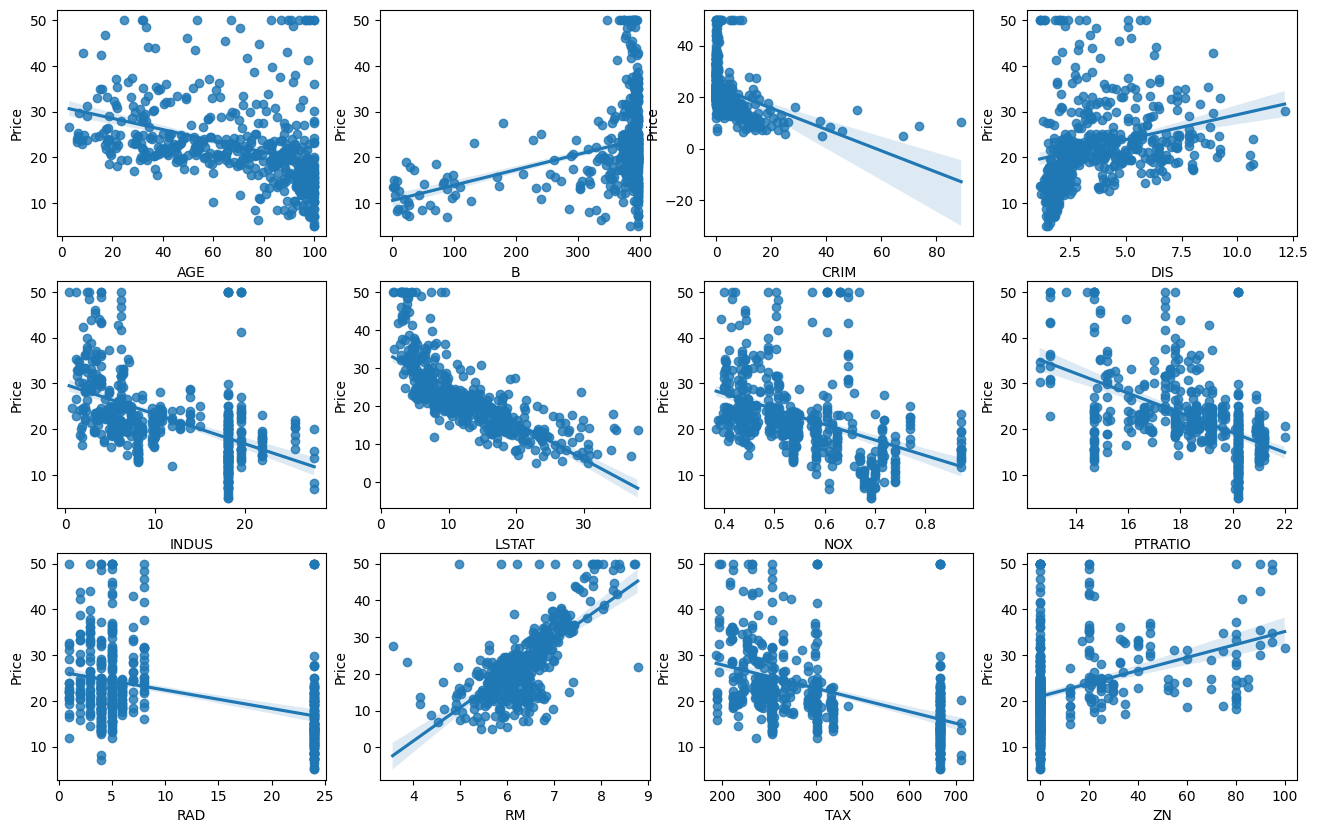

In [8]:
# subplots를 이용하여 Price와 CHAS 컬럼을 제외한 나머지 컬럼들 간의 산점도 그래프 그리기
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

# cols를 기준으로 반복문 실행 
for i, column in zip(range(len(cols)), cols):
    # row = i // 4
    row = int(i / 4)
    col = i % 4
    sns.regplot(x = column, y = boston['Price'], data = boston, ax = axes[row][col])

plt.show()

In [9]:
# 모든 컬럼을 기준으로 train, test 데이터셋으로 데이터 분할
# 독립 변수는 주택의 가격을 제외한 나머지 컬럼들
X = boston.drop('Price', axis= 1).values      # values를 붙이면 행렬(array) 데이터가 된다.
Y = boston['Price'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size= 0.2, random_state= 100
)

In [12]:
# 종속변수의 학습 데이터와 평가 데이터의 평균 확인
print(Y_train.mean())
print(Y_test.mean())

22.621039603960394
22.18333333333333


In [13]:
# 모델 선택 - 선형회귀 기본 모델
from sklearn.linear_model import LinearRegression

In [14]:
# 객체(class) 생성
lr = LinearRegression()

In [ ]:
# 학습
# 모델에 X_train, Y_train 학습
lr.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# 예측
# 독립변수 중 평가 데이터로 구성된 X_test 데이터를 대입
pred = lr.predict(X_test)
pred
# 데이터를 한 줄씩 돌려가며 집값을 보여줌

array([34.4081095 , 31.18524626, 22.31286141, 17.88613877, 20.43572131,
       26.14444413, 26.21920244, 23.57978445, 22.41577853, 19.51182817,
       26.86691495, 17.20411302, 20.68511041, 15.67921778, 41.69912781,
       20.2946735 , 28.99258631, 19.06413492, 32.48035595, 41.13627224,
       34.64732462, 16.38997909, 20.42215729, 18.05324255, 13.38743087,
       12.64800748, 27.45930237, 20.30199107, 18.78954741, 20.24950994,
       15.60161419, 24.38040555, 38.95651978, 24.7184131 , 31.26791961,
       28.26279775, 15.84707127, 14.76661568, 16.79024244, 23.23674899,
       22.85417065, 23.48976177, 14.16818173, 21.42613087, 32.38362329,
       26.7881669 , 19.37574824, 15.27894103, 17.21175121, 12.91591919,
       21.84063224, 20.25050371, 23.65622638, 23.9608324 , 11.94749102,
       14.49718052, 24.69872363, 34.18169066, 10.30437821, 21.04686616,
       17.96204214, 19.76593459, 17.45231513, 29.982971  , 20.73183476,
       25.24657823, 15.81416285, 24.96705225, 22.1298931 , 20.77

In [17]:
pred_df = pd.DataFrame(pred, columns= ['Pred Price'])
actual_df = pd.DataFrame(Y_test, columns= ['Actual Price'])
test_df = pd.DataFrame(X_test, columns= boston.columns.difference(['Price']))

In [18]:
# 두 데이터프레임을 단순 열 결합
pd.concat( [test_df, pred_df, actual_df], axis= 1)

,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN,Pred Price,Actual Price
0,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62,34.408110,34.6
1,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76,31.185246,31.5
2,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,22.312861,20.6
3,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,17.886139,14.5
4,0.25356,0.0,9.90,0.0,0.544,5.705,77.7,3.9450,4.0,304.0,18.4,396.42,11.50,20.435721,16.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,36.185086,50.0
98,14.23620,0.0,18.10,0.0,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32,18.010970,7.2
99,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,23.182265,50.0
100,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16,13.772710,14.0


In [19]:
# 평가 지표 생성
import numpy as np
from sklearn.metrics import \
    mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error, root_mean_squared_error
    # MAE, MSE, MSLE, MAPE, RMSE

In [ ]:
# Y_test: 실젯값, pred: 예측값
mae = mean_absolute_error(Y_test, pred)
mse = mean_squared_error(Y_test, pred)
msle = mean_squared_log_error(Y_test, pred)
mape = mean_absolute_percentage_error(Y_test, pred)
rmse = root_mean_squared_error(Y_test, pred)
rmse2 = np.sqrt(mse)

# sklearn.metrics의 root_mean_squared_error가 사용 불가능할 때
# rmse = np.sqrt(mse)

In [ ]:
print("MAE : ", round(mae, 2))
print("MSE : ", round(mse, 2))
print("RMSE : ", round(rmse, 2))
print("RMSE2 : ", round(rmse2, 2))
print('MSLE : ', round(msle, 2))
print('MAPE : ', round(mape, 2) * 100)

# 이 값들은 오차의 평균이므로, 작을수록 예측도가 높다.

MAE:  3.25
MSE:  23.62
MSLE:  0.05
MAPE:  17.0
RMSE:  4.86


In [22]:
from sklearn.metrics import r2_score

# 결정 계수 출력
r2 = r2_score( Y_test, pred )

print("R2 Score: ", round(r2, 2))

R2 Score:  0.76


In [26]:
# R2-Score의 문제: 컬럼(피쳐)의 개수가 많아지면 R2-Score가 증가하는 경향
# 수정된 R2-Score 생성
# 1 - ( (1 - r2)*(n - 1) / (n - p - 1) )

# X_test의 인덱스의 수
n = X_test.shape[0]
# X_test의 컬럼의 수
p = X_test.shape[1]

adj_r2 = 1 - ( (1 - r2)*(n - 1) / (n - p - 1) )

print('Adj R2 Score: ', round(adj_r2, 2))
# 높으면 좋다. 일반적으로 0.6~0.8

Adj R2 Score:  0.72


In [27]:
# 회귀계수 출력
print( lr.coef_ )

[-8.14896492e-02  4.80407782e-02 -5.47150249e-03  3.06260576e+00
 -1.61368815e+01  3.67245067e+00 -8.51525259e-03 -1.51740854e+00
  2.87271007e-01 -1.21207598e-02 -9.24160757e-01  9.53460812e-03
 -4.85895548e-01]


In [30]:
# 컬럼별 회귀계수
pd.Series(
    lr.coef_,
    index = boston.columns.difference(['Price'])   # Price 제외
)

# --> 굉장히 작은 것들은 제거하고 예측 모델 다시 돌리기

AGE        -0.081490
B           0.048041
CHAS       -0.005472
CRIM        3.062606
DIS       -16.136881
INDUS       3.672451
LSTAT      -0.008515
NOX        -1.517409
PTRATIO     0.287271
RAD        -0.012121
RM         -0.924161
TAX         0.009535
ZN         -0.485896
dtype: float64

#### 연습
1. boston 데이터에서 B, CHAS, LSTAT, TAX 컬럼을 제외
2. 독립변수는 Price를 제외한 나머지 데이터
3. 종속변수는 Price 데이터
4. train 데이터와 test 데이터를 7 : 3 비율로 분할 (random_state는 42로 고정)
5. Scaler를 이용하여 train data를 스케일링 (Min-Max Scaler 사용)
6. 선형회귀(LinearRegression) 모델을 이용하여 학습, 예측
7. 실젯값과 예측값의 평가 지표로 MAE, MSE, MSLE, R2, Adj R2 출력

In [ ]:
df = boston.drop(['B', 'CHAS', 'LSTAT', 'TAX'], axis=1)

In [ ]:
X = df.iloc[:, :-1].values
Y = df['Price'].values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
X = df.iloc[:, :-1].values
Y = df['Price'].values
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mmscaler = MinMaxScaler()

In [ ]:
mmscaler.fit(X_train)

In [ ]:
X_train_sc = mmscaler.transform(X_train)
X_test_sc = mmscaler.transform(X_test)

In [ ]:
lr = LinearRegression()

In [ ]:

lr.fit(X_train_sc, Y_train)

In [ ]:

pred_sc = lr.predict(X_test_sc)

In [ ]:

mae_sc = mean_absolute_error(Y_test, pred_sc)
mse_sc = mean_squared_error(Y_test, pred_sc)
msle_sc = mean_squared_log_error(Y_test, pred_sc)
r2_sc = r2_score(Y_test, pred_sc)

n = X_test_sc.shape[0]
p = X_test_sc.shape[1]
adj_r2_sc = 1 - ( (1-r2_sc)*(n - 1) / (n - p - 1) ) 

In [ ]:
print(round(mae, 2), round(mae_sc, 2))
print(round(mse, 2), round(mse_sc, 2))
print(round(msle, 2), round(msle_sc, 2))
print(round(r2, 2), round(r2_sc, 2))
print(round(adj_r2, 2), round(adj_r2_sc, 2))

In [ ]:
boston.corr(method='pearson')['Price'].abs().sort_values(ascending=False)